# Mass Spring Damper Example
<img src="fig/msd.png" alt="Drawing" style="width: 500px;" align="right"/>

The equation of motion is given as:

$m \ddot{x}(t) + c \dot{x}(t) + k x(t) = u(t)$

You are given the following physical parameters.
* c=2 N/(m/s)
* k=2 N/m
* m=1 kg

## Laplace Method for Matrix Exponential

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
import sympy

sympy.init_printing()
t = sympy.symbols('t', real=True)
s = sympy.symbols('s')
c = 2
k = 2

A = sympy.Matrix([[0, 1], [-k, -c]])
B = sympy.Matrix([[0], [1]])
C = sympy.Matrix([[1, 0]])
D = sympy.Matrix([[0]])
(A, B, C, D)

⎛⎡0   1 ⎤  ⎡0⎤             ⎞
⎜⎢      ⎥, ⎢ ⎥, [1  0], [0]⎟
⎝⎣-2  -2⎦  ⎣1⎦             ⎠

$G(s) = C(sI - A)^{-1}B + D$

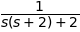

In [28]:
N = (s*sympy.eye(2) - A).inv()
G = (C*N*B + D)
G.simplify()
G = G[0]
G

$\mathcal{L}^{-1}\left[ \dfrac{1}{sI- A}^{-1}\right] = e^{At}$

In [29]:
eAt = sympy.inverse_laplace_transform((s*sympy.eye(2) - A).inv(), s, t)
eAt

⎡                   -t                      -t                          ⎤
⎢(sin(t) + cos(t))⋅ℯ  ⋅Heaviside(t)        ℯ  ⋅sin(t)⋅Heaviside(t)      ⎥
⎢                                                                       ⎥
⎢        -t                                              -t             ⎥
⎣    -2⋅ℯ  ⋅sin(t)⋅Heaviside(t)      (-sin(t) + cos(t))⋅ℯ  ⋅Heaviside(t)⎦

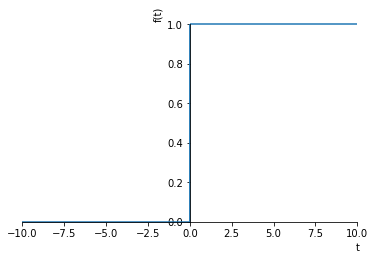

In [30]:
sympy.plot(sympy.Heaviside(t))

In [31]:
sympy.Matrix.exp(A*t)*sympy.Heaviside(t)

⎡⎛ -t           -t       ⎞                        -t                          
⎢⎝ℯ  ⋅sin(t) + ℯ  ⋅cos(t)⎠⋅Heaviside(t)          ℯ  ⋅sin(t)⋅Heaviside(t)      
⎢                                                                             
⎢          -t                            ⎛   -t           -t       ⎞          
⎣      -2⋅ℯ  ⋅sin(t)⋅Heaviside(t)        ⎝- ℯ  ⋅sin(t) + ℯ  ⋅cos(t)⎠⋅Heaviside

   ⎤
   ⎥
   ⎥
   ⎥
(t)⎦

## Spectral Method for Matrix Exponential

The approach here will be to use the diagonalization of A.

In [32]:
A

⎡0   1 ⎤
⎢      ⎥
⎣-2  -2⎦

In [33]:
evects = sympy.Matrix.eigenvects(A)
evects

⎡⎛           ⎡⎡-(1 - ⅈ) ⎤⎤⎞  ⎛           ⎡⎡-(1 + ⅈ) ⎤⎤⎞⎤
⎢⎜           ⎢⎢─────────⎥⎥⎟  ⎜           ⎢⎢─────────⎥⎥⎟⎥
⎢⎜-1 - ⅈ, 1, ⎢⎢    2    ⎥⎥⎟, ⎜-1 + ⅈ, 1, ⎢⎢    2    ⎥⎥⎟⎥
⎢⎜           ⎢⎢         ⎥⎥⎟  ⎜           ⎢⎢         ⎥⎥⎟⎥
⎣⎝           ⎣⎣    1    ⎦⎦⎠  ⎝           ⎣⎣    1    ⎦⎦⎠⎦

$T = \left[ \xi_1 \xi_2 \right]$

Diagonolization:

$ A = T diag(\lambda_1, \lambda_2) T^{-1}$

In [37]:
T = sympy.Matrix.hstack(evects[0][2][0], evects[1][2][0])
T

⎡-(1 - ⅈ)   -(1 + ⅈ) ⎤
⎢─────────  ─────────⎥
⎢    2          2    ⎥
⎢                    ⎥
⎣    1          1    ⎦

In [38]:
T_inv = T.inv()
T_inv.simplify()
T_inv

⎡    1   ⅈ⎤
⎢-ⅈ  ─ - ─⎥
⎢    2   2⎥
⎢         ⎥
⎢    1   ⅈ⎥
⎢ⅈ   ─ + ─⎥
⎣    2   2⎦

In [39]:
Lambda = sympy.diag(evects[0][0], evects[1][0])
Lambda

⎡-1 - ⅈ    0   ⎤
⎢              ⎥
⎣  0     -1 + ⅈ⎦

Let's check that are diagonalization of A worked as expected.

In [40]:
A_check = (T*Lambda*T.inv())
sympy.expand(A_check, complex=True), A

⎛⎡0   1 ⎤  ⎡0   1 ⎤⎞
⎜⎢      ⎥, ⎢      ⎥⎟
⎝⎣-2  -2⎦  ⎣-2  -2⎦⎠

We can calculate the exponential of the diagonal matrix containing the eigen values, it is just the exponential of each element of the diagonal.

In [42]:
LambdaExp = sympy.diag(sympy.exp(evects[0][0]*t), sympy.exp(evects[1][0]*t))
LambdaExp

⎡ t⋅(-1 - ⅈ)             ⎤
⎢ℯ                 0     ⎥
⎢                        ⎥
⎢              t⋅(-1 + ⅈ)⎥
⎣     0       ℯ          ⎦

In [43]:
eAt_spec = (T*LambdaExp*T_inv).expand(complex=True)*sympy.Heaviside(t)
eAt_spec

⎡⎛ -t           -t       ⎞                        -t                          
⎢⎝ℯ  ⋅sin(t) + ℯ  ⋅cos(t)⎠⋅Heaviside(t)          ℯ  ⋅sin(t)⋅Heaviside(t)      
⎢                                                                             
⎢          -t                            ⎛   -t           -t       ⎞          
⎣      -2⋅ℯ  ⋅sin(t)⋅Heaviside(t)        ⎝- ℯ  ⋅sin(t) + ℯ  ⋅cos(t)⎠⋅Heaviside

   ⎤
   ⎥
   ⎥
   ⎥
(t)⎦

In [44]:
eAt

⎡                   -t                      -t                          ⎤
⎢(sin(t) + cos(t))⋅ℯ  ⋅Heaviside(t)        ℯ  ⋅sin(t)⋅Heaviside(t)      ⎥
⎢                                                                       ⎥
⎢        -t                                              -t             ⎥
⎣    -2⋅ℯ  ⋅sin(t)⋅Heaviside(t)      (-sin(t) + cos(t))⋅ℯ  ⋅Heaviside(t)⎦

## Response given initial conditions

$\vec{x} = \begin{bmatrix}x  \\ \dot{x} \end{bmatrix}$

$\vec{x}(t) = e^{At}\vec{x}(0) + \int_0^t e^{A(t - \tau)}  B u(\tau) d\tau$

$\vec{y}(t) = C \vec{x}(t) + D\vec{u}(t)$

In [45]:
x0 = sympy.Matrix([1, 0])
x0

⎡1⎤
⎢ ⎥
⎣0⎦

In [46]:
x = eAt*x0
x

⎡                   -t             ⎤
⎢(sin(t) + cos(t))⋅ℯ  ⋅Heaviside(t)⎥
⎢                                  ⎥
⎢        -t                        ⎥
⎣    -2⋅ℯ  ⋅sin(t)⋅Heaviside(t)    ⎦

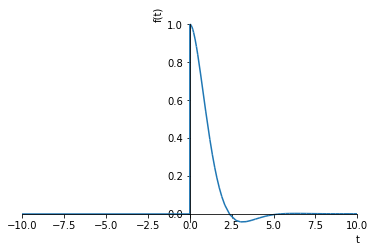

In [451]:
sympy.plot(x[0])

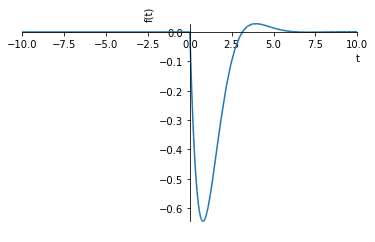

In [47]:
sympy.plot(x[1])

# Final Value Theorem

$G(s) = Y(s)/U(s)$

$\lim\limits_{t \rightarrow \infty} x(t) = \lim\limits_{s \rightarrow 0} s X(s)$

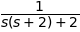

In [48]:
G

## Unit step of magnitude 

$ X = G\cdot U$

$ X = (X/U)\cdot U$

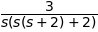

In [50]:
U1 = 3/s
X1 = G*U1
X1

In [51]:
u1 = sympy.inverse_laplace_transform(U1, s, t)
u1

In [52]:
x1_final = (s*X1).subs(s, 0)
x1_final

In [53]:
x1 = sympy.inverse_laplace_transform(X1, s, t).expand(complex=True)
x1

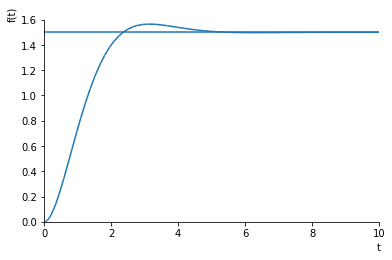

In [55]:
sympy.plot(x1, x1_final, (t, 0, 10))

## Impulse of magnitude 2

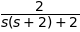

In [58]:
U2 = 2
X2 = G*U2
X2

In [59]:
u2 = sympy.inverse_laplace_transform(U2, s, t)
u2

In [64]:
x2_final = (s*X2).subs(s, 0)
x2_final

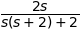

In [65]:
s*X2

In [66]:
x2 = sympy.inverse_laplace_transform(X2, s, t).expand(complex=True)
x2

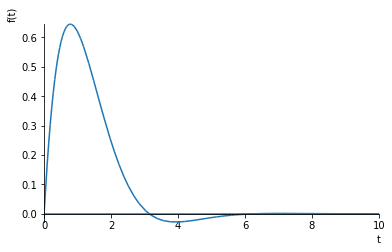

In [67]:
sympy.plot(x2, x2_final, (t, 0, 10))